<a href="https://colab.research.google.com/github/Datians/3erCorteDiscretas/blob/main/Trabajo_3er_corte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marco Teórico**

## **NetworkX**

NetworkX es una biblioteca de Python ampliamente utilizada para la creación, manipulación y análisis de grafos y redes. Ofrece una gran variedad de algoritmos clásicos y avanzados, como el cálculo de árboles de expansión mínima, la verificación de isomorfismos y la comprobación de grafos planares. Su facilidad de uso y su eficiencia la convierten en una herramienta poderosa para abordar problemas complejos relacionados con grafos, especialmente en aplicaciones académicas y científicas.

## **Cupy**

CuPy es una biblioteca diseñada para realizar cálculos numéricos en GPU, basada en la sintaxis de NumPy. Al paralelizar las operaciones matemáticas y matriciales, CuPy acelera significativamente la implementación de algoritmos en problemas de grafos y árboles, como los relacionados con flujo máximo o árboles de juegos. Es particularmente útil en escenarios donde se procesan grandes volúmenes de datos, permitiendo resolver problemas de forma más eficiente.

## **Conceptos Clave**

**Grafos:** Estructuras que representan relaciones entre nodos conectados por aristas. Pueden ser dirigidos o no, y ponderados o no. Ejemplos: redes sociales y sistemas de transporte.

**Isomorfismos de Gráficas:** Dos gráficas son isomorfas si tienen la misma estructura de conexión, permitiendo identificar equivalencias en problemas de redes y optimización.

**Grafos Planares:** SGrafos que pueden representarse sin cruces en sus aristas. Según el Teorema de Kuratowski, no son planos si contienen K sub 5 o K sub 3,3.

**Árboles:** Subgrafos conexos y sin ciclos que conectan todos los nodos. Útiles en búsqueda, optimización y jerarquías.

**Árboles de Expansión Mínima:** Árboles que conectan todos los nodos de un grafo ponderado con el costo más bajo. Algoritmos: Prim y Kruskal.

**Árboles de Decisión:** Estructuras para modelar procesos de decisión mediante preguntas en nodos internos y respuestas en terminales. Usados en clasificación e inteligencia artificial.

**Árboles de Juegos:** Representan decisiones en juegos de dos jugadores. Evaluados con Minimax para maximizar resultados de un jugador mientras se minimizan los del oponente.

**Isomorfismos de Árboles:** Dos árboles son isomorfos si tienen la misma estructura jerárquica, manteniendo correspondencias uno a uno entre sus nodos.

**Flujo Máximo:** Optimiza el flujo entre una fuente y un sumidero en una red con capacidades limitadas. Algoritmos como Edmonds-Karp garantizan soluciones eficientes.

In [ ]:
import cupy as cp
import numpy as np

class Grafo:
  def __init__(self, tamano, max_peso=100):
    self.tamano = tamano
    self.max_peso = max_peso

  def generar_matriz_pesos_cupy(self):
    matriz = cp.random.randint(1, self.max_peso + 1, size=(self.tamano, self.tamano)).astype(cp.float32)
    matriz = cp.triu(matriz)
    matriz += matriz.T - cp.diag(matriz.diagonal())
    cp.fill_diagonal(matriz, cp.inf)
    return matriz

  def generar_matriz_pesos_numpy(self):
    matriz = np.random.randint(1, self.max_peso + 1, size=(self.tamano, self.tamano)).astype(cp.float32)
    matriz = np.triu(matriz)
    matriz += matriz.T - np.diag(matriz.diagonal())
    np.fill_diagonal(matriz, np.inf)
    return matriz

# **Isomorfismos de Gráficas**

La idea principal de isomorfismo de gráficas es que dos gráficas pueden “parecer” diferentes cuando las dibujas, pero en realidad son estructuralmente idénticas. Esto significa que las conexiones entre los vértices son exactamente las mismas, aunque la posición o el orden de los vértices en el dibujo pueda variar.

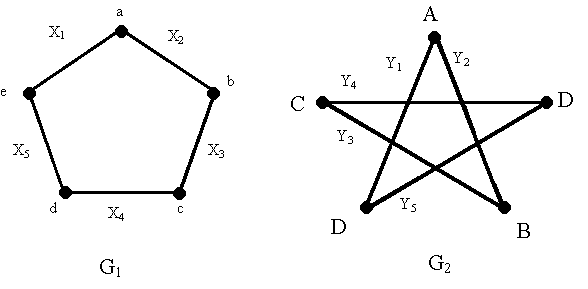



## **Isomorfismo y su importancia en la Teoría de Grafos.**

El isomorfismo en teoría de grafos es importante porque:

•	Permite identificar la equivalencia estructural entre grafos.

•	Facilita la clasificación y comparación de redes.

•	Ayuda a resolver problemas en ciencias de la computación, química, biología y optimización de redes.


In [ ]:
#Implementación clásica de grafos isomorfos
import numpy as np
from itertools import permutations
from time import time

def are_isomorphic(graph1, graph2):
    """
    Verifica si dos grafos son isomorfos usando permutaciones de vértices.

    :param graph1: Matriz de adyacencia del primer grafo.
    :param graph2: Matriz de adyacencia del segundo grafo.
    :return: True si los grafos son isomorfos, False en caso contrario.
    """
    # Verificar que los grafos tengan el mismo número de vértices
    n1, n2 = len(graph1), len(graph2)
    if n1 != n2:
        return False

    # Generar todas las permutaciones de vértices
    start = time()
    vertices = list(range(n1))
    for perm in permutations(vertices):
        # Reordenar filas y columnas de graph1 según la permutación
        permuted_graph1 = graph1[np.ix_(perm, perm)]
        if np.array_equal(permuted_graph1, graph2):
            end = time()
            print(f"Tiempo de ejecución: {end - start} segundos")
            return True
    end = time()
    print(f"Tiempo de ejecución: {end - start} segundos")
    return False

# Ejemplo de uso
graph1 = np.array([
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
])

graph2 = np.array([
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
])

result = are_isomorphic(graph1, graph2)
print("¿Son isomorfos?", result)

Tiempo de ejecución: 0.00017333030700683594 segundos
¿Son isomorfos? True


In [ ]:
#Implementación usando NetworkX
from time import time
import networkx as nx
from networkx.algorithms.isomorphism import GraphMatcher

# Crear grafos
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 1)])

G2 = nx.Graph()
G2.add_edges_from([(4, 5), (5, 6), (6, 4)])

# Verificar isomorfismo
start = time()
gm = GraphMatcher(G1, G2)
end = time()
print(f"Tiempo de ejecución: {end - start} segundos")
print("¿Son isomorfos?", gm.is_isomorphic())

Tiempo de ejecución: 0.00015306472778320312 segundos
¿Son isomorfos? True


In [ ]:
#Solución paralela usando CuPY
import cupy as cp

# Crear matrices de adyacencia
A1 = cp.array([
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
])

A2 = cp.array([
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
])

# Comparar matrices
start = time()
is_isomorphic = cp.array_equal(A1, A2)
end = time()
print(f"Tiempo de ejecución: {end - start} segundos")
print("¿Son isomorfas?", bool(is_isomorphic))

Tiempo de ejecución: 0.0004398822784423828 segundos
¿Son isomorfas? True


# **Grafos Planares**

Los grafos planares son aquellos que pueden ser dibujados en un plano (como una hoja de papel) sin que sus aristas se crucen, excepto en los vértices donde se conectan.

**Definición formal**

Un grafo  G  es planar si existe una representación de  G  en el plano donde:

•	Los vértices se representan como puntos.

•	Las aristas se representan como líneas curvas o rectas.

•	Ninguna arista se cruza con otra, salvo en los vértices donde se encuentran.

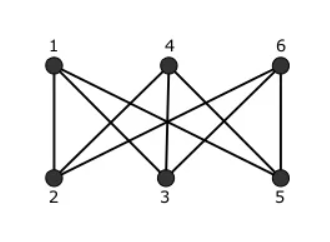

## **Teorema de Kuratowski**

Es un criterio fundamental en la teoría de grafos para determinar si un grafo es no planar.

**Condiciones:**
Si en un grafo  G :

•	Existe una subdivisión de  K_5  (gráfica completa de 5 vértices)

•	Existe una subdivisión de  K_3,3 (gráfica bipartita completa con 6 vértices),

entonces  G  no es planar.

Por el contrario, si un grafo no contiene ninguna subdivisión de  K_5  o  K_3,3 , entonces  G  es planar.


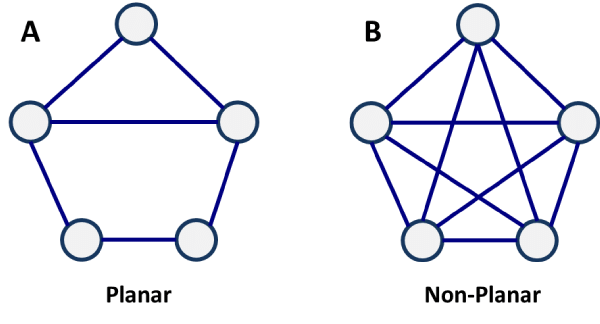


In [ ]:
#Implementación clásica
from time import time
"""
    Verifica si un grafo es planar basado en la fórmula de Euler y en la condición
    de Kuratowski.

    Parámetros:
    V -- Número de vértices
    E -- Número de aristas
    F -- Número de caras (si es conocido, opcional en algunos contextos)

    Retorno:
    True si el grafo es planar, False en caso contrario.
    """

def is_planar_classic(V, E, F):
  start = time()
  # Verificar la fórmula de Euler: V - E + F = 2 para grafos planos conexos
  if V - E + F != 2:
    end = time()
    print("Tiempo de ejecucion: ", end - start)
    return False

  # Condición de Kuratowski: el número de aristas debe ser menor o igual a 3V - 6
  # para grafos simples y conexos con V >= 3

  if V >= 3 and E > 3 * V - 6:
    end = time()
    print("Tiempo de ejecucion: ", end - start)
    return False
  end = time()
  print("Tiempo de ejecucion: ", end - start)
  return True

# Ejemplo
V = 5  # Número de vértices
E = 9  # Número de aristas
F = 6  # Número de caras (calculado o proporcionado)
print("¿Es planar?", is_planar_classic(V, E, F))

Tiempo de ejecucion:  4.76837158203125e-07
¿Es planar? True


In [ ]:
#Solución usando networkx
import networkx as nx

# Crear un grafo
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0), (0, 2)])

# Verificar si es planar
start = time()
is_planar, _ = nx.check_planarity(G)
end = time()
print("Tiempo de ejecucion: ", end - start)
print("¿Es planar?", is_planar)

Tiempo de ejecucion:  0.0010645389556884766
¿Es planar? True


In [ ]:
#Solución paralela usando CuPY
import cupy as cp

def is_planar_cupy(V, E, F):
    """
    Verificar planaridad usando la fórmula de Euler en paralelo.
    """
    # Crear arrays en GPU
    start = time()
    V_gpu = cp.array(V)
    E_gpu = cp.array(E)
    F_gpu = cp.array(F)

    # Aplicar fórmula de Euler
    planar_condition = V_gpu - E_gpu + F_gpu == 2
    edge_condition = E_gpu <= 3 * V_gpu - 6

    # Devolver resultado
    result = cp.logical_and(planar_condition, edge_condition).item()
    end = time()
    print("Tiempo de ejecucion: ", end - start)
    return bool()

# Ejemplo
V, E, F = 5, 10, 7  # Suponer valores conocidos
print("¿Es planar (paralelo)?", is_planar_cupy(V, E, F))

Tiempo de ejecucion:  0.0019154548645019531
¿Es planar (paralelo)? False


# **Árboles de Expansión Mínima**

Un árbol de expansión mínima (AEM) es una subgráfica de una gráfica ponderada (donde las aristas tienen pesos o costos asociados) que cumple las siguientes condiciones:

1.	Es un árbol:

	•	Contiene todos los vértices de la gráfica original.

	•	Es conexa (cualquier vértice puede alcanzarse desde cualquier otro).

	•	No tiene ciclos (no hay caminos cerrados).

2.	Minimiza el costo total:

	•	La suma de los pesos (o costos) de las aristas en el árbol es la mínima posible entre todas las combinaciones posibles de subgrafos conexos sin ciclos.

**Aplicación con Redes**

El objetivo de un AEM es conectar todos los nodos de la red al menor costo posible, evitando redundancias y ciclos innecesarios. Esto asegura una red eficiente y económica, manteniendo la conectividad.

¿Cómo funciona un AEM en redes?

Imagina que necesitas construir una red (como una carretera o una red eléctrica) que conecte varios puntos geográficos o computacionales. Al usar un árbol de expansión mínima, lograrás:

1.	Conectar todos los nodos: Ningún punto queda aislado.

2.	Minimizar el costo total: Se eligen solo las conexiones necesarias y más baratas.

3.	Evitar ciclos: No habrá caminos redundantes que aumenten innecesariamente el costo.

In [ ]:
from time import time

def prim(graph, start=0):
  n = len(graph)
  selected = [False] * n
  selected[start] = True
  mst_edges = []
  num_edges = 0
  start = time()

  while num_edges < n - 1:
      min_weight = float('inf')
      u, v = -1, -1

      for i in range(n):
          if selected[i]:
              for j in range(n):
                  if not selected[j] and graph[i][j] < min_weight:
                      min_weight = graph[i][j]
                      u, v = i, j

      if u != -1 and v != -1:
          mst_edges.append((u, v))
          selected[v] = True
          num_edges += 1
  end = time()
  time_elapsed = end - start
  print("Tiempo de ejecucion con el metodo clásico: ", time_elapsed)
  return mst_edges, time_elapsed

In [ ]:
from time import time
import networkx as nx

def arbolExpansionMinima(matriz_pesos):
  G = nx.Graph()
  n = len(matriz_pesos)
  start = time()
  for i in range(n):
    for j in range(i + 1, n):
      if matriz_pesos[i][j] != float('inf'):
          G.add_edge(i, j, weight=matriz_pesos[i][j])

  mst = nx.minimum_spanning_tree(G, algorithm="prim")
  end = time()
  time_elapsed = end - start
  print("Tiempo de ejecucion con networkx: ", end - start)
  return mst, time_elapsed

In [ ]:
import cupy as cp
from time import time

def prim_cupy(graph, start=0):
    n = graph.shape[0]
    selected = cp.zeros(n, dtype=cp.bool_)
    selected[start] = True
    mst_edges = []
    start = time()
    for _ in range(n - 1):
      minimo = cp.inf
      u, v = -1, -1
      for i in range(n):
          if selected[i]:
              for j in range(n):
                  if not selected[j] and graph[i, j] < minimo:
                      minimo = graph[i, j]
                      u, v = i, j
      mst_edges.append((int(u), int(v)))  # Convertir a Python int
      selected[v] = True
    end = time()
    time_elapsed = end - start
    print("Tiempo de ejecucion con cupy: ", time_elapsed)
    return mst_edges, time_elapsed

In [ ]:
from time import time

class UnionFind:
    """
    Estructura para conjuntos disjuntos (Union-Find) con compresión de caminos.
    """
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])  # Compresión de caminos
        return self.parent[u]

    def union(self, u, v):
        root_u = self.find(u)
        root_v = self.find(v)
        if root_u != root_v:
            # Unión por rango
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1


def kruskal(weight_matrix):
    n = len(weight_matrix)
    edges = []

    # Crear una lista de aristas (u, v, peso) a partir de la matriz de pesos
    for i in range(n):
        for j in range(i + 1, n):  # Considerar sólo la parte superior de la matriz
            if weight_matrix[i][j] != float('inf'):  # Ignorar los infinitos
                edges.append((i, j, weight_matrix[i][j]))

    # Ordenar las aristas por peso
    edges.sort(key=lambda x: x[2])

    # Inicializar Union-Find y el árbol de expansión mínima
    uf = UnionFind(n)
    mst = []

    start_time = time()
    for u, v, weight in edges:
        if uf.find(u) != uf.find(v):  # Verificar si la arista forma un ciclo
            mst.append((u, v, weight))  # Agregar la arista al MST
            uf.union(u, v)  # Unir los conjuntos
    end_time = time()
    time_elapsed = end_time - start_time
    print(f"Tiempo de ejecución con kruskal: {time_elapsed}")
    return mst, time_elapsed

In [ ]:
weight_matrix = np.array([
    [np.inf, 2, np.inf, 6, np.inf],
    [2, np.inf, 3, 8, 5],
    [np.inf, 3, np.inf, np.inf, 7],
    [6, 8, np.inf, np.inf, 9],
    [np.inf, 5, 7, 9, np.inf]
])

# Vértice inicial (comienza en 0)
start_vertex = 0

# Ejecutar el algoritmo
mst, clasicTime = prim(weight_matrix, start=start_vertex)

# Mostrar las aristas del árbol de expansión mínima
print("Aristas del árbol de expansión mínima con el metodo clásico:")
for edge in mst:
    print(f"{edge[0]} - {edge[1]}")

mst, clasicKruskalTime = kruskal(weight_matrix)

# Mostrar las aristas del árbol de expansión mínima
print("Aristas del árbol de expansión mínima con el metodo clásico con kruskal:")
for edge in mst:
    print(f"{edge[0]} - {edge[1]}")

# Ejecutar el algoritmo
mst, networkTime = arbolExpansionMinima(weight_matrix)

# Mostrar las aristas del árbol de expansión mínima
print("Aristas del árbol de expansión mínima con el metodo numpy:")
for u, v, weight in mst.edges(data=True):
  print(f"({u}, {v}) - peso: {weight['weight']}")

weight_matrix = cp.array([
  [np.inf, 2, np.inf, 6, np.inf],
  [2, np.inf, 3, 8, 5],
  [np.inf, 3, np.inf, np.inf, 7],
  [6, 8, np.inf, np.inf, 9],
  [np.inf, 5, 7, 9, np.inf]
])

start_vertex = 0

mst, cupyTime = prim_cupy(weight_matrix, start=start_vertex)
print("Aristas del árbol de expansión mínima con el metodo cupy:")
for edge in mst:
  print(f"{edge[0]} - {edge[1]}")

print("Comparaciones")
classicTimeVsNetwork = (clasicTime / networkTime) * 100
classicTimeVsCupy = (cupyTime / clasicTime) * 100
networkTimeVsCupy = (cupyTime / networkTime) * 100
networkTimeVsClassic = (networkTime / clasicTime) * 100
print("Porcentaje de tiempo de ejecución de clasico vs networkX: ", classicTimeVsNetwork)
print("Porcentaje de tiempo de ejecución de cupy vs clasico ", classicTimeVsCupy)
print("Porcentaje de tiempo de ejecución de cupy vs networkX ", networkTimeVsCupy)
print("Porcentaje de tiempo de ejecución de networkX vs clasico ", networkTimeVsClassic)

Tiempo de ejecucion con el metodo clásico:  2.4080276489257812e-05
Aristas del árbol de expansión mínima con el metodo clásico:
0 - 1
1 - 2
1 - 4
0 - 3
Tiempo de ejecución con kruskal: 1.9311904907226562e-05
Aristas del árbol de expansión mínima con el metodo clásico con kruskal:
0 - 1
1 - 2
1 - 4
0 - 3
Tiempo de ejecucion con networkx:  0.00020623207092285156
Aristas del árbol de expansión mínima con el metodo numpy:
(0, 1) - peso: 2.0
(0, 3) - peso: 6.0
(1, 2) - peso: 3.0
(1, 4) - peso: 5.0
Tiempo de ejecucion con cupy:  0.003669261932373047
Aristas del árbol de expansión mínima con el metodo cupy:
0 - 1
1 - 2
1 - 4
0 - 3
Comparaciones
Porcentaje de tiempo de ejecución de clasico vs networkX:  11.676300578034681
Porcentaje de tiempo de ejecución de cupy vs clasico  15237.623762376237
Porcentaje de tiempo de ejecución de cupy vs networkX  1779.1907514450866
Porcentaje de tiempo de ejecución de networkX vs clasico  856.4356435643564


In [ ]:
grafo = Grafo(200, 50)

# MATRIZ CON NUMPY
weight_matrix = np.array(grafo.generar_matriz_pesos_numpy())

# 1. Método clásico
start_vertex = 0
mst_classic, classic_time = prim(weight_matrix, start=start_vertex)
print("\nAristas del árbol de expansión mínima con el método clásico:")
for edge in mst_classic:
    print(f"{edge[0]} - {edge[1]}")

# 2. Método con NetworkX
mst_network, network_time = arbolExpansionMinima(weight_matrix)
print("\nAristas del árbol de expansión mínima con NetworkX:")
for u, v, weight in mst_network.edges(data=True):
    print(f"({u}, {v}) - peso: {weight['weight']}")

# MATRIZ CON CUPY
weight_matrix_cupy = cp.array(grafo.generar_matriz_pesos_cupy())

# 3. Método con CuPy
mst_cupy, cupy_time = prim_cupy(weight_matrix_cupy, start=start_vertex)
print("\nAristas del árbol de expansión mínima con CuPy:")
for edge in mst_cupy:
    print(f"{edge[0]} - {edge[1]}")

# Comparaciones de tiempo
print("\nComparaciones de tiempo:")
classic_vs_network = (classic_time / network_time) * 100
classic_vs_cupy = (classic_time / cupy_time) * 100
network_vs_cupy = (network_time / cupy_time) * 100

print(f"Tiempo clásico vs NetworkX: {classic_vs_network:.2f}%")
print(f"Tiempo clásico vs CuPy: {classic_vs_cupy:.2f}%")
print(f"Tiempo NetworkX vs CuPy: {network_vs_cupy:.2f}%")

Tiempo de ejecucion con el metodo clásico:  0.4818997383117676

Aristas del árbol de expansión mínima con el método clásico (Prim con numpy):
0 - 9
0 - 57
9 - 14
9 - 103
9 - 134
9 - 135
9 - 142
9 - 178
9 - 194
14 - 7
7 - 56
7 - 144
7 - 166
7 - 190
7 - 196
14 - 40
14 - 139
14 - 186
40 - 10
10 - 22
10 - 63
10 - 64
10 - 78
22 - 32
22 - 55
22 - 98
22 - 180
32 - 86
32 - 126
32 - 183
40 - 91
40 - 102
40 - 117
40 - 170
55 - 8
8 - 68
8 - 99
8 - 151
8 - 165
8 - 189
55 - 20
20 - 17
17 - 29
17 - 50
17 - 115
17 - 131
17 - 184
20 - 87
20 - 121
20 - 140
20 - 155
20 - 157
20 - 164
29 - 127
50 - 76
50 - 107
50 - 145
55 - 59
55 - 156
56 - 4
4 - 138
4 - 177
56 - 72
56 - 122
57 - 5
5 - 85
5 - 105
5 - 110
5 - 161
57 - 23
23 - 83
57 - 168
59 - 38
38 - 15
15 - 92
15 - 188
15 - 197
38 - 60
38 - 154
38 - 159
59 - 65
59 - 108
60 - 39
39 - 67
39 - 199
60 - 44
44 - 42
42 - 118
44 - 75
44 - 80
60 - 88
60 - 182
63 - 79
64 - 30
30 - 21
21 - 124
30 - 100
64 - 77
64 - 81
64 - 89
64 - 101
64 - 106
65 - 187
67 - 25
25 

# **Árboles de Decisiones y Tiempo Mínimo para Ordenar**

La relación entre los árboles de decisiones y los algoritmos de ordenamiento surge del hecho de que un árbol de decisiones puede modelar el proceso de comparación de un algoritmo de ordenamiento. En este contexto, el árbol de decisiones es una herramienta para representar las comparaciones realizadas por un algoritmo de ordenamiento.

Este árbol describe todas las posibles secuencias de decisiones que el algoritmo puede tomar para ordenar los elementos, lo que está directamente relacionado con la eficiencia del algoritmo.

Tiempo de ejecución: 0.000078 segundos


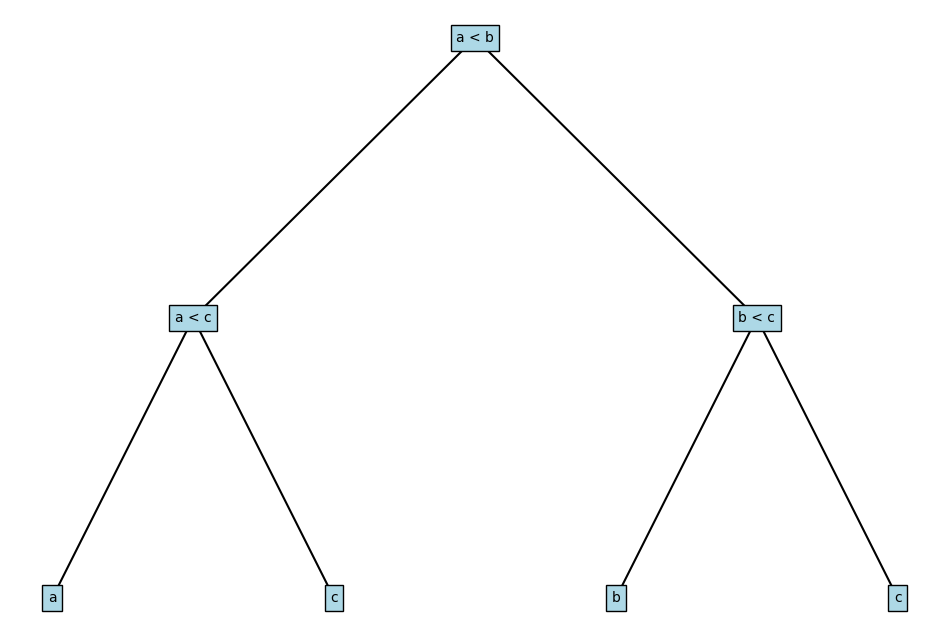

In [ ]:
import matplotlib.pyplot as plt
import time

class DecisionTreeNode:
    def __init__(self, data=None, left=None, right=None):
        self.data = data  # Comparación (ej. "a < b")
        self.left = left  # Subárbol para "True"
        self.right = right  # Subárbol para "False"

def create_decision_tree(elements):
    """
    Crear un árbol de decisiones clásico para ordenar los elementos.
    """
    if len(elements) == 1:
        return DecisionTreeNode(data=elements[0])  # Nodo hoja (permutación)

    first, *rest = elements
    return DecisionTreeNode(
        data=f"{first} < {rest[0]}",
        left=create_decision_tree([first] + rest[1:]),
        right=create_decision_tree(rest)
    )

def plot_tree(node, x=0, y=0, dx=1.0, dy=1.0, level=0, ax=None):
    """
    Visualiza el árbol de decisiones usando matplotlib.pyplot.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.axis("off")  # Quitar ejes del gráfico

    # Dibujar el nodo actual
    ax.text(x, y, str(node.data), ha="center", va="center",
            bbox=dict(facecolor="lightblue", edgecolor="black"))

    # Dibujar subárbol izquierdo
    if node.left:
        x_left, y_left = x - dx / (2**level), y - dy
        ax.plot([x, x_left], [y, y_left], color="black")  # Línea hacia la izquierda
        plot_tree(node.left, x_left, y_left, dx, dy, level + 1, ax)

    # Dibujar subárbol derecho
    if node.right:
        x_right, y_right = x + dx / (2**level), y - dy
        ax.plot([x, x_right], [y, y_right], color="black")  # Línea hacia la derecha
        plot_tree(node.right, x_right, y_right, dx, dy, level + 1, ax)

    # Mostrar el gráfico en la última llamada
    if level == 0:
        plt.show()

# Medir tiempo de ejecución
start_time = time.time()

# Ejemplo: Árbol de decisiones para ordenar tres elementos
elements = ["a", "b", "c"]
tree = create_decision_tree(elements)

end_time = time.time()

# Mostrar tiempo de ejecución
print(f"Tiempo de ejecución: {end_time - start_time:.6f} segundos")

# Visualizar el árbol de decisiones
plot_tree(tree)


Tiempo mínimo para ordenar [3, 2, 1]: 2 pasos.


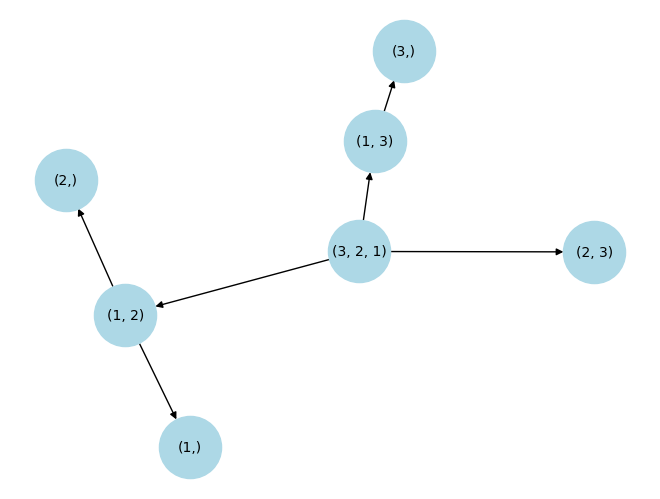

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def build_decision_tree(elements):
    """
    Construye un árbol de decisiones para ordenar una lista de elementos.
    """
    tree = nx.DiGraph()
    root = tuple(elements)
    tree.add_node(root)

    # Función recursiva para generar el árbol
    def add_decision_nodes(node):
        if len(node) <= 1:  # Caso base: un solo elemento o vacío
            return
        for i in range(len(node)):
            # Generar un nuevo estado al quitar un elemento
            new_state = tuple(sorted(node[:i] + node[i+1:]))
            if new_state not in tree:
                tree.add_node(new_state)
                tree.add_edge(node, new_state)
                add_decision_nodes(new_state)

    # Generar nodos a partir de la raíz
    add_decision_nodes(root)
    return tree

def find_minimum_time(tree):
    """
    Calcula el tiempo mínimo para ordenar una lista basada en la profundidad del árbol.
    """
    depths = nx.single_source_shortest_path_length(tree, source=list(tree.nodes)[0])
    return max(depths.values())  # La profundidad máxima es el tiempo mínimo en un árbol de decisiones

def plot_tree(tree):
    """
    Dibuja el árbol de decisiones.
    """
    pos = nx.spring_layout(tree)
    nx.draw(tree, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10)
    plt.show()

# Ejemplo de uso
elements = [3, 2, 1]
decision_tree = build_decision_tree(elements)
minimum_time = find_minimum_time(decision_tree)

print(f"Tiempo mínimo para ordenar {elements}: {minimum_time} pasos.")
plot_tree(decision_tree)


Permutaciones generadas (GPU):
[[3 2 1]
 [3 1 2]
 [2 3 1]
 [2 1 3]
 [1 3 2]
 [1 2 3]]
Tiempo total de ejecución: 0.002939 segundos


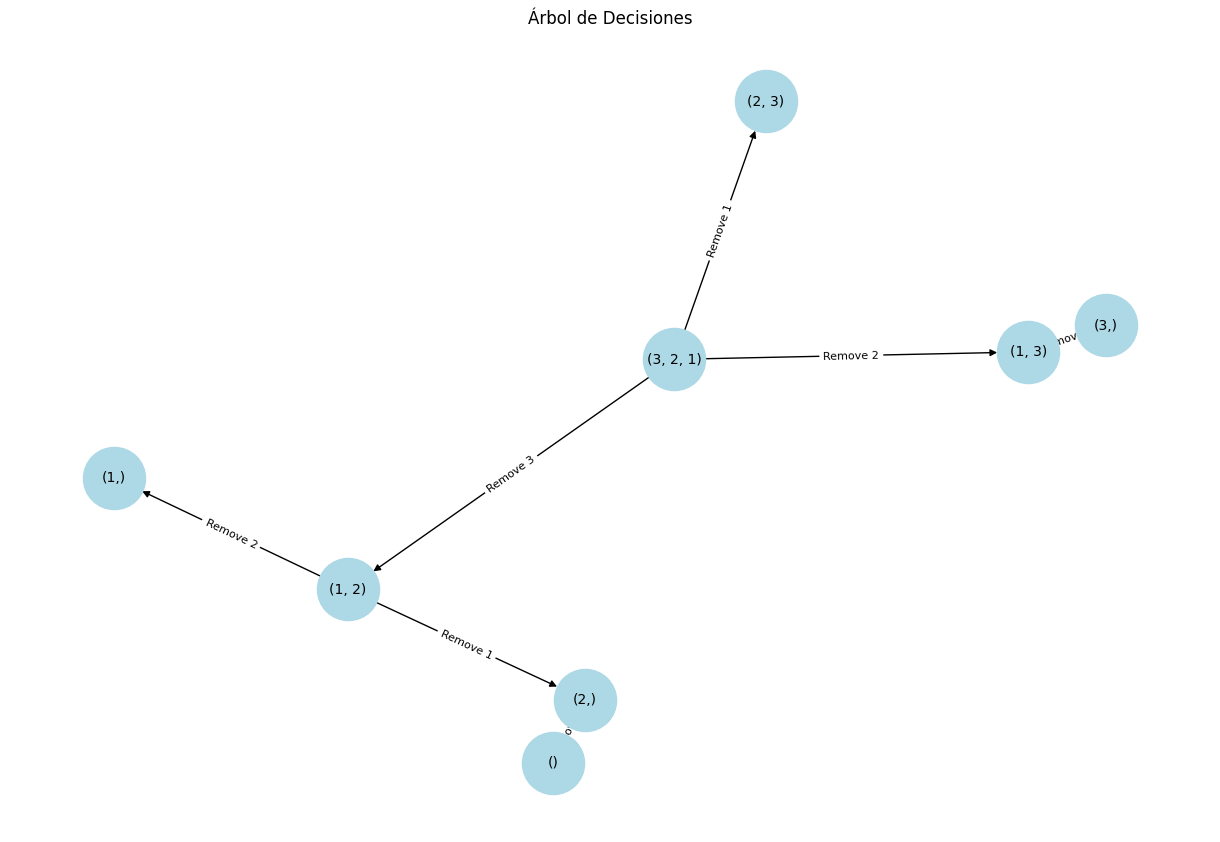

In [ ]:
import cupy as cp
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import time

def generate_states(elements):
    """
    Genera todas las permutaciones posibles usando CuPy.
    """
    # Generar todas las permutaciones en CPU y moverlas a GPU
    permutations = list(itertools.permutations(elements))
    return cp.array(permutations)

def build_decision_tree(elements):
    """
    Construye un árbol de decisiones usando NetworkX.
    """
    tree = nx.DiGraph()  # Árbol dirigido
    root = tuple(elements)  # Nodo raíz inicial
    tree.add_node(root)

    # Cola para procesamiento iterativo
    queue = [(root, list(elements))]

    while queue:
        parent_node, current_state = queue.pop(0)

        # Generar permutaciones al remover elementos uno por uno
        for i in range(len(current_state)):
            new_state = tuple(sorted(current_state[:i] + current_state[i+1:]))
            if new_state not in tree:
                tree.add_node(new_state)
                tree.add_edge(parent_node, new_state, label=f"Remove {current_state[i]}")
                queue.append((new_state, list(new_state)))
    return tree

def plot_decision_tree(tree):
    """
    Visualiza el árbol de decisiones usando NetworkX y Matplotlib.
    """
    pos = nx.spring_layout(tree)  # Posicionamiento de los nodos
    plt.figure(figsize=(12, 8))
    nx.draw(tree, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10)
    edge_labels = nx.get_edge_attributes(tree, 'label')
    nx.draw_networkx_edge_labels(tree, pos, edge_labels=edge_labels, font_size=8)
    plt.title("Árbol de Decisiones")
    plt.show()

# Iniciar medición del tiempo total
total_start_time = time.time()

# Generar el árbol usando CuPy y visualizarlo con Matplotlib
elements = [3, 2, 1]

# Generar estados con CuPy
permutations_gpu = generate_states(elements)

# Construir el árbol de decisiones
decision_tree = build_decision_tree(elements)

# Mostrar permutaciones generadas
print(f"Permutaciones generadas (GPU):\n{permutations_gpu.get()}")

# Terminar medición del tiempo total
total_end_time = time.time()
print(f"Tiempo total de ejecución: {total_end_time - total_start_time:.6f} segundos")

# Visualizar el árbol de decisiones
plot_decision_tree(decision_tree)




# **Isomorfismos de Árboles**

El isomorfismo de árboles se basa en la idea de que dos árboles son estructuralmente equivalentes si podemos encontrar una correspondencia (función) entre sus vértices que conserve las conexiones entre ellos. Es decir, aunque puedan parecer diferentes en su representación, si tienen la misma estructura, se consideran isomorfos.

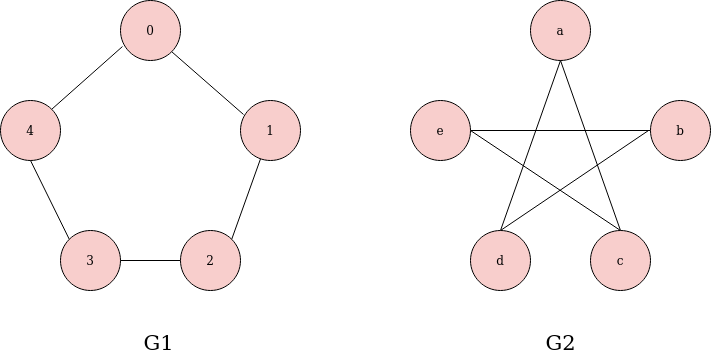

In [ ]:
import time

class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []

def are_isomorphic(tree1, tree2):
    """
    Verifica si dos árboles son isomorfos de manera clásica.
    """
    if len(tree1.children) != len(tree2.children):
        return False  # Deben tener el mismo número de hijos

    # Verificar isomorfismo recursivamente para los subárboles
    for child1, child2 in zip(tree1.children, tree2.children):
        if not are_isomorphic(child1, child2):
            return False

    return True

def build_tree_example():
    """
    Crea dos árboles de ejemplo para verificar el isomorfismo.
    """
    # Árbol 1
    tree1 = TreeNode(1)
    tree1.children = [TreeNode(2), TreeNode(3)]

    # Árbol 2
    tree2 = TreeNode(1)
    tree2.children = [TreeNode(3), TreeNode(2)]

    return tree1, tree2

# Medición del tiempo total
total_start_time = time.time()

# Crear los árboles de ejemplo
tree1, tree2 = build_tree_example()

# Verificar isomorfismo
isomorphic = are_isomorphic(tree1, tree2)

# Imprimir resultado
print("Son isomorfos:", isomorphic)  # Debería ser True

# Tiempo total
total_end_time = time.time()
print(f"Tiempo total de ejecución: {total_end_time - total_start_time:.6f} segundos")


Son isomorfos: True
Tiempo total de ejecución: 0.000190 segundos


In [ ]:
import networkx as nx
import time

# Crear árboles con NetworkX
tree1 = nx.Graph()
tree1.add_edges_from([(1, 2), (1, 3)])

tree2 = nx.Graph()
tree2.add_edges_from([(1, 3), (1, 2)])

# Medir tiempo de ejecución
start_time = time.time()

# Verificar isomorfismo
isomorphic = nx.is_isomorphic(tree1, tree2)

end_time = time.time()

# Imprimir resultado y tiempo de ejecución
print("Son isomorfos:", isomorphic)
print(f"Tiempo de ejecución: {end_time - start_time:.6f} segundos")


Son isomorfos: True
Tiempo de ejecución: 0.000889 segundos


In [ ]:
import cupy as cp
import itertools  # Se importa itertools aquí
import time

def edges_to_adj_matrix(edges, n):
    """
    Convierte una lista de aristas en una matriz de adyacencia.
    """
    adj_matrix = cp.zeros((n, n), dtype=int)
    for u, v in edges:
        adj_matrix[u-1, v-1] = 1
        adj_matrix[v-1, u-1] = 1
    return adj_matrix

def are_trees_isomorphic_parallel(tree1_edges, tree2_edges, n):
    """
    Verifica si dos árboles son isomorfos en paralelo usando matrices de adyacencia y CuPy.

    tree1_edges: Lista de aristas del árbol 1.
    tree2_edges: Lista de aristas del árbol 2.
    n: Número de nodos en los árboles.
    """
    # Convertir las listas de aristas en matrices de adyacencia
    tree1_adj = edges_to_adj_matrix(tree1_edges, n)
    tree2_adj = edges_to_adj_matrix(tree2_edges, n)

    # Verificar todas las permutaciones posibles de nodos
    for perm in cp.array(list(itertools.permutations(range(n)))):
        permuted_tree2 = tree2_adj[perm][:, perm]
        if cp.array_equal(tree1_adj, permuted_tree2):
            return True  # Son isomorfos si alguna permutación coincide

    return False  # No son isomorfos si ninguna permutación coincide

# Ejemplo de árboles representados como listas de aristas
tree1_edges = [(1, 2), (1, 3)]  # Árbol 1
tree2_edges = [(1, 3), (1, 2)]  # Árbol 2 (estructuralmente igual)
n = 3  # Número de nodos

# Medir el tiempo de ejecución
start_time = time.time()

# Verificar isomorfismo
isomorphic = are_trees_isomorphic_parallel(tree1_edges, tree2_edges, n)

end_time = time.time()

# Mostrar el resultado y el tiempo de ejecución
print("Son isomorfos (paralelo):", isomorphic)  # True
print(f"Tiempo de ejecución: {end_time - start_time:.6f} segundos")


Son isomorfos (paralelo): True
Tiempo de ejecución: 0.000945 segundos


# **Árboles de Juegos**

Un árbol de juego es una estructura jerárquica que representa todas las posibles secuencias de movimientos en un juego. En este árbol:

1.	Cada nodo corresponde a una posición o estado del juego.

2.	Cada arista representa un movimiento.

3.	Las hojas (nodos terminales) representan el final del juego.

El objetivo de analizar el árbol de juego es desarrollar estrategias óptimas para ganar el juego (o minimizar las probabilidades de perder). Esto se logra asignando valores a los nodos del árbol, comenzando desde los vértices terminales hacia la raíz, utilizando una técnica llamada retropropagación de valores.


**Uso en Inteligencia Artificial**

El uso de árboles de juegos en inteligencia artificial tiene un papel crucial en el desarrollo de estrategias de juego y en la simulación de comportamientos en entornos interactivos y competitivos.

In [ ]:
import time

class GameTreeNode:
    def __init__(self, state, children=None, value=None):
        self.state = state  # Representa el estado del juego
        self.children = children if children else []  # Subárboles o estados hijos
        self.value = value  # Valor del nodo (evaluación para Minimax)

def generate_game_tree(state, depth, player=1):
    """
    Genera un árbol de juegos hasta una profundidad dada.
    """
    if depth == 0 or is_terminal_state(state):
        return GameTreeNode(state, value=evaluate_state(state))

    children = []
    for move in generate_possible_moves(state, player):
        next_state = apply_move(state, move, player)
        children.append(generate_game_tree(next_state, depth-1, -player))

    return GameTreeNode(state, children=children)

def minimax(node, maximizing_player=True):
    """
    Algoritmo Minimax para evaluar el árbol de juegos.
    """
    if not node.children:  # Nodo hoja
        return node.value

    if maximizing_player:
        node.value = max(minimax(child, False) for child in node.children)
    else:
        node.value = min(minimax(child, True) for child in node.children)

    return node.value

# Funciones auxiliares
def is_terminal_state(state):
    # Determina si el estado es final (ejemplo: alguien gana o empate)
    return state in ["win", "loss", "draw"]

def evaluate_state(state):
    # Asigna valores a los estados finales (1 = ganar, -1 = perder, 0 = empate)
    return {"win": 1, "loss": -1, "draw": 0}.get(state, 0)

def generate_possible_moves(state, player):
    # Genera movimientos posibles (ejemplo simplificado)
    return ["move1", "move2", "move3"]

def apply_move(state, move, player):
    # Aplica un movimiento y devuelve el nuevo estado
    return f"{state}-{move}-{player}"

# Medir tiempo de ejecución
start_time = time.time()

# Generar y evaluar un árbol de juegos
root = generate_game_tree("start", depth=3)
minimax(root)

end_time = time.time()

# Mostrar resultado y tiempo
print("Valor del estado inicial:", root.value)
print(f"Tiempo de ejecución: {end_time - start_time:.6f} segundos")


Valor del estado inicial: 0
Tiempo de ejecución: 0.000263 segundos


In [ ]:
import time
import networkx as nx

def is_terminal_state(state):
    """
    Determina si un estado es final.
    Por simplicidad, consideramos que los estados que contienen 'win', 'loss' o 'draw' son finales.
    """
    return "win" in state or "loss" in state or "draw" in state

def generate_possible_moves(state, player):
    """
    Genera movimientos posibles desde un estado.
    Por simplicidad, devolvemos siempre tres movimientos ficticios.
    """
    return [f"move{player}_1", f"move{player}_2", f"move{player}_3"]

def apply_move(state, move, player):
    """
    Aplica un movimiento y devuelve el nuevo estado.
    """
    return f"{state}-{move}"

def build_game_tree(state, depth, player=1):
    """
    Construye un árbol de juegos usando NetworkX.
    """
    tree = nx.DiGraph()
    root = state
    tree.add_node(root)

    def add_children(node, current_depth, current_player):
        if current_depth == 0 or is_terminal_state(node):
            return
        for move in generate_possible_moves(node, current_player):
            next_state = apply_move(node, move, current_player)
            tree.add_edge(node, next_state)
            add_children(next_state, current_depth - 1, -current_player)

    add_children(root, depth, player)
    return tree

# Medir tiempo de ejecución
start_time = time.time()

# Construir el árbol de juegos
game_tree = build_game_tree("start", depth=3)

end_time = time.time()

# Mostrar nodos, aristas y tiempo
print("Nodos del árbol:", list(game_tree.nodes))
print("Aristas del árbol:", list(game_tree.edges))
print(f"Tiempo de ejecución: {end_time - start_time:.6f} segundos")


Nodos del árbol: ['start', 'start-move1_1', 'start-move1_1-move-1_1', 'start-move1_1-move-1_1-move1_1', 'start-move1_1-move-1_1-move1_2', 'start-move1_1-move-1_1-move1_3', 'start-move1_1-move-1_2', 'start-move1_1-move-1_2-move1_1', 'start-move1_1-move-1_2-move1_2', 'start-move1_1-move-1_2-move1_3', 'start-move1_1-move-1_3', 'start-move1_1-move-1_3-move1_1', 'start-move1_1-move-1_3-move1_2', 'start-move1_1-move-1_3-move1_3', 'start-move1_2', 'start-move1_2-move-1_1', 'start-move1_2-move-1_1-move1_1', 'start-move1_2-move-1_1-move1_2', 'start-move1_2-move-1_1-move1_3', 'start-move1_2-move-1_2', 'start-move1_2-move-1_2-move1_1', 'start-move1_2-move-1_2-move1_2', 'start-move1_2-move-1_2-move1_3', 'start-move1_2-move-1_3', 'start-move1_2-move-1_3-move1_1', 'start-move1_2-move-1_3-move1_2', 'start-move1_2-move-1_3-move1_3', 'start-move1_3', 'start-move1_3-move-1_1', 'start-move1_3-move-1_1-move1_1', 'start-move1_3-move-1_1-move1_2', 'start-move1_3-move-1_1-move1_3', 'start-move1_3-move-1_2', 

In [ ]:
import cupy as cp
import time

def evaluate_states_parallel(states):
    """
    Evalúa múltiples estados finales en paralelo usando CuPy.
    Los estados se convierten a valores numéricos para ser procesados.
    """
    # Medir tiempo de inicio
    start_time = time.time()

    # Mapear estados a valores numéricos
    state_mapping = {"win": 1, "loss": -1, "draw": 0}
    states_mapped = [state_mapping[state] for state in states]

    # Convertir a un array de CuPy
    states_gpu = cp.array(states_mapped, dtype=int)

    # Obtener valores en la CPU
    result = states_gpu.get()

    # Medir tiempo de finalización
    end_time = time.time()
    print(f"Tiempo de ejecución: {end_time - start_time:.6f} segundos")

    return result

# Estados finales simulados
states = ["win", "loss", "draw", "win", "draw"]
values = evaluate_states_parallel(states)
print("Valores evaluados en paralelo:", values)


Tiempo de ejecución: 0.000849 segundos
Valores evaluados en paralelo: [ 1 -1  0  1  0]


# **Algoritmo de Flujo Máximo**

El problema de flujo máximo en una red de transporte es un problema clave en teoría de grafos y optimización combinatoria. Este problema se centra en maximizar la cantidad de flujo que puede ser transportado de un nodo origen a un nodo destino a través de una red de aristas, cada una con una capacidad limitada.

**Su relevancia:**

La relevancia del problema de flujo máximo y sus aplicaciones es inmensa, ya que se utiliza en una amplia gama de disciplinas para resolver problemas de optimización y diseño de sistemas en redes. Este problema subyace en muchos de los sistemas que usamos cotidianamente y es fundamental para el desarrollo de soluciones eficientes y efectivas en la gestión de recursos.

In [ ]:
from collections import deque
import time

def bfs(residual_graph, source, sink, parent):
    """
    Realiza una búsqueda en amplitud (BFS) en el grafo residual para encontrar un camino aumentante.
    """
    visited = set()
    queue = deque([source])
    visited.add(source)

    while queue:
        node = queue.popleft()
        for neighbor, capacity in residual_graph[node].items():
            if neighbor not in visited and capacity > 0:
                queue.append(neighbor)
                visited.add(neighbor)
                parent[neighbor] = node
                if neighbor == sink:
                    return True
    return False

def edmonds_karp(capacity_graph, source, sink):
    """
    Implementa el algoritmo de Edmonds-Karp para flujo máximo.
    """
    # Crear el grafo residual
    residual_graph = {u: {} for u in capacity_graph}
    for u in capacity_graph:
        for v in capacity_graph[u]:
            residual_graph[u][v] = capacity_graph[u][v]
            residual_graph[v][u] = 0

    parent = {}
    max_flow = 0

    while bfs(residual_graph, source, sink, parent):
        # Encontrar la capacidad mínima en el camino aumentante
        path_flow = float('Inf')
        v = sink
        while v != source:
            u = parent[v]
            path_flow = min(path_flow, residual_graph[u][v])
            v = u

        # Actualizar capacidades residuales
        v = sink
        while v != source:
            u = parent[v]
            residual_graph[u][v] -= path_flow
            residual_graph[v][u] += path_flow
            v = u

        max_flow += path_flow

    return max_flow

# Ejemplo de uso
capacity_graph = {
    0: {1: 16, 2: 13},
    1: {2: 10, 3: 12},
    2: {1: 4, 4: 14},
    3: {2: 9, 5: 20},
    4: {3: 7, 5: 4},
    5: {}
}
source, sink = 0, 5

# Medir tiempo de ejecución
start_time = time.time()
max_flow = edmonds_karp(capacity_graph, source, sink)
end_time = time.time()

# Mostrar el resultado y el tiempo de ejecución
print("Máximo flujo:", max_flow)
print(f"Tiempo de ejecución: {end_time - start_time:.6f} segundos")


Máximo flujo: 23
Tiempo de ejecución: 0.000079 segundos


In [ ]:
import networkx as nx
import time

# Crear un grafo dirigido con capacidades
G = nx.DiGraph()
G.add_edge(0, 1, capacity=16)
G.add_edge(0, 2, capacity=13)
G.add_edge(1, 2, capacity=10)
G.add_edge(1, 3, capacity=12)
G.add_edge(2, 1, capacity=4)
G.add_edge(2, 4, capacity=14)
G.add_edge(3, 2, capacity=9)
G.add_edge(3, 5, capacity=20)
G.add_edge(4, 3, capacity=7)
G.add_edge(4, 5, capacity=4)

# Medir tiempo de ejecución
start_time = time.time()

# Resolver el problema de flujo máximo
flow_value, flow_dict = nx.maximum_flow(G, _s=0, _t=5)

end_time = time.time()

# Mostrar el resultado y el tiempo de ejecución
print("Máximo flujo:", flow_value)
print(f"Tiempo de ejecución: {end_time - start_time:.6f} segundos")


Máximo flujo: 23
Tiempo de ejecución: 0.001600 segundos


In [ ]:
import cupy as cp
import time

def edmonds_karp_parallel(capacity_matrix, source, sink):
    """
    Implementa el algoritmo de Edmonds-Karp en paralelo usando CuPy.
    """
    n = capacity_matrix.shape[0]
    residual_matrix = cp.copy(capacity_matrix)
    max_flow = 0

    while True:
        # Realizar una BFS para encontrar un camino aumentante
        parent = cp.full(n, -1)
        queue = cp.array([source])
        parent[source] = -2
        path_flow = cp.inf

        while queue.size > 0:
            u = queue[0]
            queue = queue[1:]

            for v in range(n):
                if parent[v] == -1 and residual_matrix[u, v] > 0:
                    parent[v] = u
                    path_flow = min(path_flow, residual_matrix[u, v])
                    if v == sink:
                        break
                    queue = cp.append(queue, v)
            else:
                continue
            break

        if parent[sink] == -1:
            break

        # Actualizar capacidades residuales
        v = sink
        while v != source:
            u = parent[v]
            residual_matrix[u, v] -= path_flow
            residual_matrix[v, u] += path_flow
            v = u

        max_flow += path_flow

    return max_flow

# Ejemplo de uso
capacity_matrix = cp.array([
    [0, 16, 13, 0, 0, 0],
    [0, 0, 10, 12, 0, 0],
    [0, 4, 0, 0, 14, 0],
    [0, 0, 9, 0, 0, 20],
    [0, 0, 0, 7, 0, 4],
    [0, 0, 0, 0, 0, 0]
], dtype=int)
source, sink = 0, 5

# Medir tiempo de ejecución
start_time = time.time()

max_flow = edmonds_karp_parallel(capacity_matrix, source, sink)

end_time = time.time()

# Mostrar el resultado y el tiempo de ejecución
print("Máximo flujo (paralelo):", max_flow)
print(f"Tiempo de ejecución: {end_time - start_time:.6f} segundos")


Máximo flujo (paralelo): 23
Tiempo de ejecución: 2.813839 segundos


# **Reflexión General sobre las Ventajas y Desventajas de los Métodos Implementados**


**1. Algoritmos Clásicos**

Ventajas:
1.	Comprensión Profunda:
- Permiten un control completo del proceso, favoreciendo el aprendizaje detallado de la teoría subyacente.
- Ideales para quienes desean comprender el funcionamiento interno de los algoritmos.
2.	Portabilidad:
- No requieren bibliotecas externas, lo que los hace fáciles de ejecutar en entornos básicos.
3.	Flexibilidad:
- Se pueden personalizar fácilmente para abordar problemas específicos o escenarios únicos.

Desventajas:
1.	Eficiencia Limitada:
- Carecen de optimizaciones avanzadas, por lo que suelen ser más lentos en problemas grandes o complejos.
2.	Tiempo de Desarrollo:
- Requieren más tiempo y esfuerzo para implementarlos correctamente, especialmente en casos avanzados como flujo máximo.
3.	Escalabilidad Reducida:
- A medida que aumenta el tamaño del problema (por ejemplo, grafos grandes o árboles con miles de nodos), el rendimiento disminuye significativamente.
________________________________________
**2. NetworkX**

Ventajas:
1.	Facilidad de Uso:
- Proporciona funciones predefinidas para resolver problemas como flujo máximo, isomorfismo de grafos y árboles, o generación de árboles de decisión.
2.	Eficiencia Razonable:
- Optimizado para problemas pequeños y medianos, ofreciendo una buena relación entre rendimiento y facilidad de implementación.
3.	Visualización y Herramientas:
- Incluye capacidades de visualización, lo que es útil para entender gráficamente la estructura y los resultados de problemas de grafos y árboles.

Desventajas:
1.	Dependencia de Biblioteca:
- Depende de NetworkX, lo que puede ser una limitación en entornos donde no se permite el uso de bibliotecas externas.
2.	Menor Control:
- La abstracción dificulta la personalización o el análisis detallado del comportamiento del algoritmo.
3.	Escalabilidad Limitada:
- Aunque es más eficiente que los métodos clásicos, NetworkX opera en CPU y tiene dificultades para manejar problemas masivos (>10,000 nodos).
________________________________________
**3. CuPy**

Ventajas:
1.	Rendimiento Superior:
- Las operaciones paralelas en GPU permiten manejar problemas grandes (árboles y grafos con miles o millones de nodos) de manera mucho más eficiente.
2.	Escalabilidad:
- Ideal para problemas donde el tamaño o la densidad del grafo o árbol crece exponencialmente.
3.	Optimización Automática:
- Aprovecha la infraestructura de hardware de GPU para acelerar operaciones matriciales intensivas, como la comparación de matrices de adyacencia o BFS paralela.

Desventajas:
1.	Requiere Hardware Especializado:
- Necesita una GPU compatible, lo que no siempre está disponible en entornos generales.
2.	Complejidad Inicial:
- La implementación puede ser más compleja y requiere conocimientos adicionales sobre programación paralela.
3.	Sobrecarga para Problemas Pequeños:
- Para problemas pequeños, la transferencia de datos entre CPU y GPU puede superar los beneficios del paralelismo, haciendo que sea más lento que NetworkX.


# **Conclusión**

**Métodos Clásicos:** Ideales para aprender y comprender algoritmos, pero menos eficientes en problemas grandes.

**NetworkX:** Excelente para problemas pequeños y medianos por su facilidad de uso, aunque limitado en escalabilidad.

**CuPy:** Imprescindible para problemas masivos debido a su rendimiento y capacidad de paralelismo, pero requiere hardware especializado y conocimientos avanzados.